<div style="border:solid green 2px; padding: 20px">
<b>Привет, Антон!</b>

Меня зовут Александр, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from tqdm.notebook import tqdm
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords as nltk_stopwords

In [2]:
 df = pd.read_csv('/datasets/toxic_comments.csv')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Огонь, данные на месте:)</div>

Изучим данные

In [3]:
df.info()
print(df.head(10))
print('Количество явных дубликтов:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
   Unnamed: 0                                               text  toxic
0           0  Explanation\nWhy the edits made under my usern...      0
1           1  D'aww! He matches this background colour I'm s...      0
2           2  Hey man, I'm really not trying to edit war. It...      0
3           3  "\nMore\nI can't make any real suggestions on ...      0
4           4  You, sir, are my hero. Any chance you remember...      0
5           5  "\n\nCongratulations from me as well, use the ...      0
6           6       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1
7           7  Your vandalism to the Matt Shirvington artic

In [4]:
def clear_text(text):
    text = text.lower()  
    clear_text  = re.sub(r"(?:\n|\r)", " ", text)
    clear_text = re.sub(r"[^a-zA-Z ]+", "", text).strip()
    return clear_text

In [5]:
df['clear_text'] = df['text'].apply(clear_text)
print(df.head(10))

   Unnamed: 0                                               text  toxic  \
0           0  Explanation\nWhy the edits made under my usern...      0   
1           1  D'aww! He matches this background colour I'm s...      0   
2           2  Hey man, I'm really not trying to edit war. It...      0   
3           3  "\nMore\nI can't make any real suggestions on ...      0   
4           4  You, sir, are my hero. Any chance you remember...      0   
5           5  "\n\nCongratulations from me as well, use the ...      0   
6           6       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
7           7  Your vandalism to the Matt Shirvington article...      0   
8           8  Sorry if the word 'nonsense' was offensive to ...      0   
9           9  alignment on this subject and which are contra...      0   

                                          clear_text  
0  explanationwhy the edits made under my usernam...  
1  daww he matches this background colour im seem...  
2  hey ma

Посмотрим сколько у нас токсичных/нектоксичных текстов

In [6]:
display(df['toxic'].value_counts())
#Выведем соотношение
class_ratio = df['toxic'].value_counts()[0] / df['toxic'].value_counts()[1]
class_ratio

0    143106
1     16186
Name: toxic, dtype: int64

8.841344371679229

<AxesSubplot:>

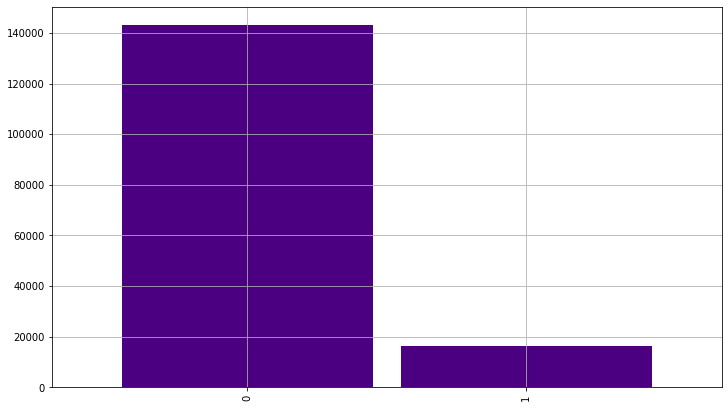

In [7]:
df['toxic'].value_counts().plot(
    kind='bar',
    stacked=True,
    grid=True,
    color='indigo',
    width=0.9,
    figsize=(12,7)
    )

Видим дисбаланс классов 90%-10%. 

Лемматизация и стоп слова

In [8]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    x = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    return " ".join(x)

tqdm.pandas()
df['text_lemma'] = df['clear_text'].apply(lemmatize_text)

nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stopwords)



[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> В данном случае проводишь лемматизацию по предложениям, а нужно по словам. Чтобы разбить предложения на слова можно воспользоваться nltk.word_tokenize(text)


+  https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Хорошо:)</div>

## Обучение

Определяем признаки и целевой признак, разделяем датасет на выборки:

In [9]:
target = df['toxic']
features = df.drop(['toxic'], axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.2, 
                                                                              random_state=12345)

features_train = count_tf_idf.fit_transform(features_train['text_lemma'])
features_test = count_tf_idf.transform(features_test['text_lemma'])
cv_counts=2

Тест на адекватность моделей

In [10]:
const_model = [1 for i in range(len(target_test))]
const_f1 = f1_score(target_test.reset_index(drop=True), const_model)
print(const_f1)


0.1841032802302716


Логистическая регрессия

In [11]:
classificator = LogisticRegression()
hyperparams = [{'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'C':[0.1, 1, 10],
                'class_weight':['balanced']}]


print('# Tuning hyper-parameters for f1_score')
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1',cv=cv_counts)
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
LR_best_params = clf.best_params_
print(LR_best_params)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_LR = max(means)
print('F1 на cv', cv_f1_LR)


# Tuning hyper-parameters for f1_score

Best parameters set found on development set:

{'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}

Grid scores on development set:

0.685525 for {'C': 0.1, 'class_weight': 'balanced', 'solver': 'newton-cg'}
0.685525 for {'C': 0.1, 'class_weight': 'balanced', 'solver': 'lbfgs'}
0.685365 for {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
0.733152 for {'C': 1, 'class_weight': 'balanced', 'solver': 'newton-cg'}
0.733177 for {'C': 1, 'class_weight': 'balanced', 'solver': 'lbfgs'}
0.733171 for {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}
0.753021 for {'C': 10, 'class_weight': 'balanced', 'solver': 'newton-cg'}
0.753097 for {'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}
0.753050 for {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}

F1 на cv 0.753097437582278


<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Молодец, что смог побить нужное значение метрики на кросс валидации:)</div>

Деревья

In [12]:
classificator = DecisionTreeClassifier()
hyperparams = [{'max_depth':[x for x in range(20,60,2)],
                'random_state':[1515],
                'class_weight':['balanced']}]


print('# Tuning hyper-parameters for f1_score')
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1',cv=cv_counts)
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
DTC_best_params = clf.best_params_
print(DTC_best_params)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_DTC = max(means)
print('F1 на cv', cv_f1_DTC)
              

# Tuning hyper-parameters for f1_score

Best parameters set found on development set:

{'class_weight': 'balanced', 'max_depth': 56, 'random_state': 1515}

Grid scores on development set:

0.581900 for {'class_weight': 'balanced', 'max_depth': 20, 'random_state': 1515}
0.574353 for {'class_weight': 'balanced', 'max_depth': 22, 'random_state': 1515}
0.573427 for {'class_weight': 'balanced', 'max_depth': 24, 'random_state': 1515}
0.583418 for {'class_weight': 'balanced', 'max_depth': 26, 'random_state': 1515}
0.586330 for {'class_weight': 'balanced', 'max_depth': 28, 'random_state': 1515}
0.593532 for {'class_weight': 'balanced', 'max_depth': 30, 'random_state': 1515}
0.589368 for {'class_weight': 'balanced', 'max_depth': 32, 'random_state': 1515}
0.596162 for {'class_weight': 'balanced', 'max_depth': 34, 'random_state': 1515}
0.594982 for {'class_weight': 'balanced', 'max_depth': 36, 'random_state': 1515}
0.591485 for {'class_weight': 'balanced', 'max_depth': 38, 'random_state': 1515}
0

CatBoost

In [13]:
classificator = CatBoostClassifier(verbose=False, iterations=100)
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_test)
cv_f1_CBC = cross_val_score(classificator,
                                         features_train, 
                                         target_train, 
                                         cv=cv_counts, 
                                         scoring='f1').mean()

print('F1 на cv', cv_f1_CBC)

F1 на cv 0.7136012586231906


In [14]:
index = ['LogisticRegression',
         'DecisionTreeClassifier',
         'CatBoostClassifier']
data = {'F1':[cv_f1_LR,
                    cv_f1_DTC,
                    cv_f1_CBC]}

scores_data = pd.DataFrame(data=data, index=index)
scores_data

,F1
LogisticRegression,0.753097
DecisionTreeClassifier,0.610623
CatBoostClassifier,0.713601


In [ ]:

model = LogisticRegression(C=10, class_weight='balanced', solver='lbfgs')
model.fit(features_train, target_train)
predict = model.predict(features_test)
f1_score(target_test, predict)



<div class="alert alert-danger">
<b>Комментарий ревьюера V2❌:</b> Необходимо на тесте побить нужное значение метрики. У тебя получилось небольшое значение , так как просто использовать дефолтную LogisticRegression, а не подобранную. 
    
    
Лучшая модель получилась именно с такими гиперпараметрами:`{'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}` Используя их необходимо обучить модель и проверить на тесте 
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V3✔️:</b> Да, хорошо</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Перевод в unicode актуально для русского языка, который был в тренажере, в данной задаче это делать нет необходимости

</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> В дальнейшем используешь GridSearchCV, который основан на кросс валидации, поэтому использование валидации избыточно. Лучше соединить обучающую и валидационную выборку, так мы больше данных выучим, а значит лучше научимся обобщать их

+  https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right
+  https://academy.yandex.ru/handbook/ml/article/kross-validaciya

P.S С помощью `model.best_score_` можно узнать лучшую метрику у GridSearchCV
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично, молодец, верно используешь Tfidf.
    
    
Совет: Внутри кросс-валидации происходит разбиение выборки на train и valid. Однако, в таком случае векторизатор обучен на всей выборке(train), а это не совсем корректно. Чтобы избежать это можно воспользоваться Pipeline:
    
```python
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('logreg', LogisticRegression(random_state=42)),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'logreg__C': [1,2,6]
}

grid_search_tune = RandomizedSearchCV(pipeline, parameters, cv=3, n_jobs=-1, scoring='f1', verbose=3)
grid_search_tune.fit(train_features, train_targets)
  
    
```
    
Это просто каркас, можешь сам выбрать какие параметры использовать для подбора:) 
    
+  https://runebook.dev/ru/docs/scikit_learn/modules/generated/sklearn.model_selection.halvinggridsearchcv - тут про HalvingGridSearchCV
    
+  https://www.rupython.com/python-sklearn-pipeline-pipeline-28301.html - про pipeline
+  https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d

</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
Верно сделал, но давай для начала не будем проводить балансировку классов, а обучим модель и посмотрим, что мы получим на кросс валидации, а не на тесте (ЭТО ВАЖНО), мы модели сравниваем опираясь на кросс валидацию, иначе просто нет смысла в GridSearchCV. 
    
    
Но если ты посмотришь на f1 используя GridSearchCV/cross_val_score, то у тебя скорее всего получится очень хороший результат потому что:
    
Сбалансирование выборки до подбора параметров модели может привести к переоценке производительности модели на несбалансированных данных, поскольку модель будет обучаться на данных, которые не соответствуют истинной распределению в выборке. Это может привести к выбору параметров модели, которые не оптимальны для несбалансированных данных, и к снижению производительности модели при работе на реальных данных.

Предлагаю воспользоваться библиотекой imblearn 

+  https://medium.com/thecyphy/handling-imbalanced-datasets-with-imblearn-library-df5e58b968f4
+  https://imbalanced-learn.org/stable/
    
Класс `Pipeline` в библиотеке `imblearn` является расширением класса `Pipeline` из библиотеки `sklearn`. Он добавляет возможность использовать пайплайны для обработки несбалансированных данных.

Основное отличие `Pipeline` в `imblearn` от `Pipeline`в `sklearn` заключается в том, что `Pipeline` в `imblearn` имеет несколько дополнительных методов и классов, которые используются для работы с несбалансированными данными. Некоторые из них:

+  `Pipeline(steps, sampler=None, ...)` - класс, который позволяет задавать стратегию сэмплирования (undersampling/oversampling) для несбалансированных данных.


В целом, `Pipeline` в `imblearn` является расширением `Pipeline` в `sklearn`, которое добавляет дополнительную функциональность для работы с несбалансированными данными.    
 
Тут пример: (в колабе более подробно)
    
```python
pipeline_oversampling_tree = imbPipeline([
    ('tfidf', TfidfVectorizer()),
    ('oversampling', RandomOverSampler(random_state=0)),
    ('tree', DecisionTreeClassifier(random_state=42))])


parameters = {'tfidf__max_df': (0.25, 0.5, 0.75),
              'tfidf__ngram_range': [(1, 1), (1, 2)],
              'tree__max_depth':[1, 4, 7, 10, 13, 16, 19, 22], 
              'tree__min_samples_split':range(2, 5),
              'tree__min_samples_leaf': range(1,3)}    
```
+  https://colab.research.google.com/drive/1dCu48GIZV33dffH5IBVTf-LYyIgfDCZW?usp=sharing   - там я оставил пример      
    
 Но лучше попробовать улучшить качество не используя upsampling/downsamling мне кажется это не сильно поможет
    
+  Можно попробовать поиграться/поизучать параметры у Tfidf это должно дать небольшое улучшение
+  Можно удалить очень редкие слова, допустим если в нашем корпусе слово встречается меньше 2-3 раз, то считаем что в нем ошибка, либо очень специфическое слово и удаляем его
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> в конце проекта необходимо протестировать лучшую модель;)
</div>

Вывод:
На первом этапе произведена загрузка данных и их подготовка для обучения моделей. 
Датасет состоит из 2 столбцов с данными и 159571 строк. 
Затем тексты комментариев были очищены и лемматизированы, произведена балансировка.  
Проверка соотношения классов показала, что в датасете имеет место явный дисбаланс. Мажорный класс составляет лишь 10% от всего датасета. 
Датасет разбили на выборки. 

По результатам подбора гиперпараметров и обучения моделей наилучший результат показала Логистическая регрессия. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 

Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множество реализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 
    
</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Антон , получился хороший проект! 
    
Если есть  если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>


<div class="alert alert-success">
<b>Комментарий ревьюера V3✔️:</b> Удачи в следующих проектах!!!</div>